In [37]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
flood = pd.read_csv("data/flood.csv")
flood

,canonical_url,date_published,domain,from_user_botscore,from_user_id,from_user_screen_name,id,original_query,pub_date,title,to_user_botscore,to_user_id,to_user_screen_name,tweet_created_at,tweet_id,tweet_type,tweet_url,url_id,url_raw
0,NaN,2025-07-10T05:44:55.737Z,NaN,NaN,did:plc:mqf54kaagi4ah6lrbt64td7c,jar065.bsky.social,NaN,NaN,2025-07-10T05:44:55.737Z,NaN,NaN,did:plc:qbzolwc7eeiplcghrwhp4kmq,wadkinz.bsky.social,2025-07-10T05:44:55.737Z,at://did:plc:mqf54kaagi4ah6lrbt64td7c/app.bsky...,reply,https://twitter.com/jar065.bsky.social/status/...,NaN,NaN
1,NaN,2025-07-10T05:42:06.440Z,NaN,NaN,did:plc:aptglza2pugxy4nss2aiu2er,dhambrick63.bsky.social,NaN,NaN,2025-07-10T05:42:06.440Z,NaN,NaN,did:plc:dc3npcufn6kovtfy2ctzj74x,freebroomrides.bsky.social,2025-07-10T05:42:06.440Z,at://did:plc:aptglza2pugxy4nss2aiu2er/app.bsky...,reply,https://twitter.com/dhambrick63.bsky.social/st...,NaN,NaN
2,NaN,2025-07-10T05:41:48.836Z,NaN,NaN,did:plc:5a42db7sry5e4lmrxsrkooax,itspicanotpika.bsky.social,NaN,NaN,2025-07-10T05:41:48.836Z,NaN,NaN,did:plc:zmw72zwhh27piy75erue36ap,penance-xo.bsky.social,2025-07-10T05:41:48.836Z,at://did:plc:5a42db7sry5e4lmrxsrkooax/app.bsky...,reply,https://twitter.com/itspicanotpika.bsky.social...,NaN,NaN
3,NaN,2025-07-10T05:41:43.840Z,NaN,NaN,did:plc:2wvcnvf4oetkemlpq7egso7i,preferspuppies.bsky.social,NaN,NaN,2025-07-10T05:41:43.840Z,NaN,NaN,did:plc:5o6k7jvowuyaquloafzn3cfw,thetnholler.bsky.social,2025-07-10T05:41:43.840Z,at://did:plc:2wvcnvf4oetkemlpq7egso7i/app.bsky...,quote,https://twitter.com/preferspuppies.bsky.social...,NaN,NaN
4,NaN,2025-07-10T05:40:51.439Z,NaN,NaN,did:plc:f4rqtrimydy4jedmp7g2nnbg,lynnwinx.bsky.social,NaN,NaN,2025-07-10T05:40:51.439Z,NaN,NaN,did:plc:occbscmv5jstjxwzcylqdzau,thryse.com,2025-07-10T05:40:51.439Z,at://did:plc:f4rqtrimydy4jedmp7g2nnbg/app.bsky...,reply,https://twitter.com/lynnwinx.bsky.social/statu...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,NaN,2025-07-10T02:20:55.540Z,NaN,NaN,did:plc:xtyqzn2mfk6quqc4ssvbk5kj,mumsie.bsky.social,NaN,NaN,2025-07-10T02:20:55.540Z,NaN,NaN,did:plc:xa3pgnkxx22dgrv3j37yeceg,skyriders1.bsky.social,2025-07-10T02:20:55.540Z,at://did:plc:xa3pgnkxx22dgrv3j37yeceg/app.bsky...,retweet,https://twitter.com/mumsie.bsky.social/status/...,NaN,NaN
633,NaN,2025-07-10T02:20:10.339Z,NaN,NaN,did:plc:ledvwwvt3eyow2qdvy5ysobm,mmc123.bsky.social,NaN,NaN,2025-07-10T02:20:10.339Z,NaN,NaN,did:plc:wrsf35zye5xmlfaje5zyyega,us-news.bsky.social,2025-07-10T02:20:10.339Z,at://did:plc:wrsf35zye5xmlfaje5zyyega/app.bsky...,retweet,https://twitter.com/mmc123.bsky.social/status/...,NaN,NaN
634,NaN,2025-07-10T02:19:04.340Z,NaN,NaN,did:plc:6t2yqcq3ay5fri2ujz7kxwun,vickyschauer.bsky.social,NaN,NaN,2025-07-10T02:19:04.340Z,NaN,NaN,did:plc:jinbokw4nsilbassqmtacxvc,murkylurkyturkey.bsky.social,2025-07-10T02:19:04.340Z,at://did:plc:jinbokw4nsilbassqmtacxvc/app.bsky...,retweet,https://twitter.com/vickyschauer.bsky.social/s...,NaN,NaN
635,NaN,2025-07-10T02:18:19.537Z,NaN,NaN,did:plc:zo3dxkeuh7fpiw5vbabgcftl,sharonlynne.bsky.social,NaN,NaN,2025-07-10T02:18:19.537Z,NaN,NaN,did:plc:5jaf3uydzehallg3hymo5ftj,sisterswendy.bsky.social,2025-07-10T02:18:19.537Z,at://did:plc:5jaf3uydzehallg3hymo5ftj/app.bsky...,retweet,https://twitter.com/sharonlynne.bsky.social/st...,NaN,NaN


In [39]:
# Drop columns with all null values from the flood dataframe
flood = flood.dropna(axis=1, how='all')
flood

,date_published,from_user_id,from_user_screen_name,pub_date,to_user_id,to_user_screen_name,tweet_created_at,tweet_id,tweet_type,tweet_url
0,2025-07-10T05:44:55.737Z,did:plc:mqf54kaagi4ah6lrbt64td7c,jar065.bsky.social,2025-07-10T05:44:55.737Z,did:plc:qbzolwc7eeiplcghrwhp4kmq,wadkinz.bsky.social,2025-07-10T05:44:55.737Z,at://did:plc:mqf54kaagi4ah6lrbt64td7c/app.bsky...,reply,https://twitter.com/jar065.bsky.social/status/...
1,2025-07-10T05:42:06.440Z,did:plc:aptglza2pugxy4nss2aiu2er,dhambrick63.bsky.social,2025-07-10T05:42:06.440Z,did:plc:dc3npcufn6kovtfy2ctzj74x,freebroomrides.bsky.social,2025-07-10T05:42:06.440Z,at://did:plc:aptglza2pugxy4nss2aiu2er/app.bsky...,reply,https://twitter.com/dhambrick63.bsky.social/st...
2,2025-07-10T05:41:48.836Z,did:plc:5a42db7sry5e4lmrxsrkooax,itspicanotpika.bsky.social,2025-07-10T05:41:48.836Z,did:plc:zmw72zwhh27piy75erue36ap,penance-xo.bsky.social,2025-07-10T05:41:48.836Z,at://did:plc:5a42db7sry5e4lmrxsrkooax/app.bsky...,reply,https://twitter.com/itspicanotpika.bsky.social...
3,2025-07-10T05:41:43.840Z,did:plc:2wvcnvf4oetkemlpq7egso7i,preferspuppies.bsky.social,2025-07-10T05:41:43.840Z,did:plc:5o6k7jvowuyaquloafzn3cfw,thetnholler.bsky.social,2025-07-10T05:41:43.840Z,at://did:plc:2wvcnvf4oetkemlpq7egso7i/app.bsky...,quote,https://twitter.com/preferspuppies.bsky.social...
4,2025-07-10T05:40:51.439Z,did:plc:f4rqtrimydy4jedmp7g2nnbg,lynnwinx.bsky.social,2025-07-10T05:40:51.439Z,did:plc:occbscmv5jstjxwzcylqdzau,thryse.com,2025-07-10T05:40:51.439Z,at://did:plc:f4rqtrimydy4jedmp7g2nnbg/app.bsky...,reply,https://twitter.com/lynnwinx.bsky.social/statu...
...,...,...,...,...,...,...,...,...,...,...
632,2025-07-10T02:20:55.540Z,did:plc:xtyqzn2mfk6quqc4ssvbk5kj,mumsie.bsky.social,2025-07-10T02:20:55.540Z,did:plc:xa3pgnkxx22dgrv3j37yeceg,skyriders1.bsky.social,2025-07-10T02:20:55.540Z,at://did:plc:xa3pgnkxx22dgrv3j37yeceg/app.bsky...,retweet,https://twitter.com/mumsie.bsky.social/status/...
633,2025-07-10T02:20:10.339Z,did:plc:ledvwwvt3eyow2qdvy5ysobm,mmc123.bsky.social,2025-07-10T02:20:10.339Z,did:plc:wrsf35zye5xmlfaje5zyyega,us-news.bsky.social,2025-07-10T02:20:10.339Z,at://did:plc:wrsf35zye5xmlfaje5zyyega/app.bsky...,retweet,https://twitter.com/mmc123.bsky.social/status/...
634,2025-07-10T02:19:04.340Z,did:plc:6t2yqcq3ay5fri2ujz7kxwun,vickyschauer.bsky.social,2025-07-10T02:19:04.340Z,did:plc:jinbokw4nsilbassqmtacxvc,murkylurkyturkey.bsky.social,2025-07-10T02:19:04.340Z,at://did:plc:jinbokw4nsilbassqmtacxvc/app.bsky...,retweet,https://twitter.com/vickyschauer.bsky.social/s...
635,2025-07-10T02:18:19.537Z,did:plc:zo3dxkeuh7fpiw5vbabgcftl,sharonlynne.bsky.social,2025-07-10T02:18:19.537Z,did:plc:5jaf3uydzehallg3hymo5ftj,sisterswendy.bsky.social,2025-07-10T02:18:19.537Z,at://did:plc:5jaf3uydzehallg3hymo5ftj/app.bsky...,retweet,https://twitter.com/sharonlynne.bsky.social/st...


In [40]:
flood = flood.drop(['pub_date','tweet_created_at','tweet_id'], axis=1)
flood

,date_published,from_user_id,from_user_screen_name,to_user_id,to_user_screen_name,tweet_type,tweet_url
0,2025-07-10T05:44:55.737Z,did:plc:mqf54kaagi4ah6lrbt64td7c,jar065.bsky.social,did:plc:qbzolwc7eeiplcghrwhp4kmq,wadkinz.bsky.social,reply,https://twitter.com/jar065.bsky.social/status/...
1,2025-07-10T05:42:06.440Z,did:plc:aptglza2pugxy4nss2aiu2er,dhambrick63.bsky.social,did:plc:dc3npcufn6kovtfy2ctzj74x,freebroomrides.bsky.social,reply,https://twitter.com/dhambrick63.bsky.social/st...
2,2025-07-10T05:41:48.836Z,did:plc:5a42db7sry5e4lmrxsrkooax,itspicanotpika.bsky.social,did:plc:zmw72zwhh27piy75erue36ap,penance-xo.bsky.social,reply,https://twitter.com/itspicanotpika.bsky.social...
3,2025-07-10T05:41:43.840Z,did:plc:2wvcnvf4oetkemlpq7egso7i,preferspuppies.bsky.social,did:plc:5o6k7jvowuyaquloafzn3cfw,thetnholler.bsky.social,quote,https://twitter.com/preferspuppies.bsky.social...
4,2025-07-10T05:40:51.439Z,did:plc:f4rqtrimydy4jedmp7g2nnbg,lynnwinx.bsky.social,did:plc:occbscmv5jstjxwzcylqdzau,thryse.com,reply,https://twitter.com/lynnwinx.bsky.social/statu...
...,...,...,...,...,...,...,...
632,2025-07-10T02:20:55.540Z,did:plc:xtyqzn2mfk6quqc4ssvbk5kj,mumsie.bsky.social,did:plc:xa3pgnkxx22dgrv3j37yeceg,skyriders1.bsky.social,retweet,https://twitter.com/mumsie.bsky.social/status/...
633,2025-07-10T02:20:10.339Z,did:plc:ledvwwvt3eyow2qdvy5ysobm,mmc123.bsky.social,did:plc:wrsf35zye5xmlfaje5zyyega,us-news.bsky.social,retweet,https://twitter.com/mmc123.bsky.social/status/...
634,2025-07-10T02:19:04.340Z,did:plc:6t2yqcq3ay5fri2ujz7kxwun,vickyschauer.bsky.social,did:plc:jinbokw4nsilbassqmtacxvc,murkylurkyturkey.bsky.social,retweet,https://twitter.com/vickyschauer.bsky.social/s...
635,2025-07-10T02:18:19.537Z,did:plc:zo3dxkeuh7fpiw5vbabgcftl,sharonlynne.bsky.social,did:plc:5jaf3uydzehallg3hymo5ftj,sisterswendy.bsky.social,retweet,https://twitter.com/sharonlynne.bsky.social/st...


In [47]:
graph = nx.from_pandas_edgelist(flood, source='from_user_id', target='to_user_id', edge_attr=True)

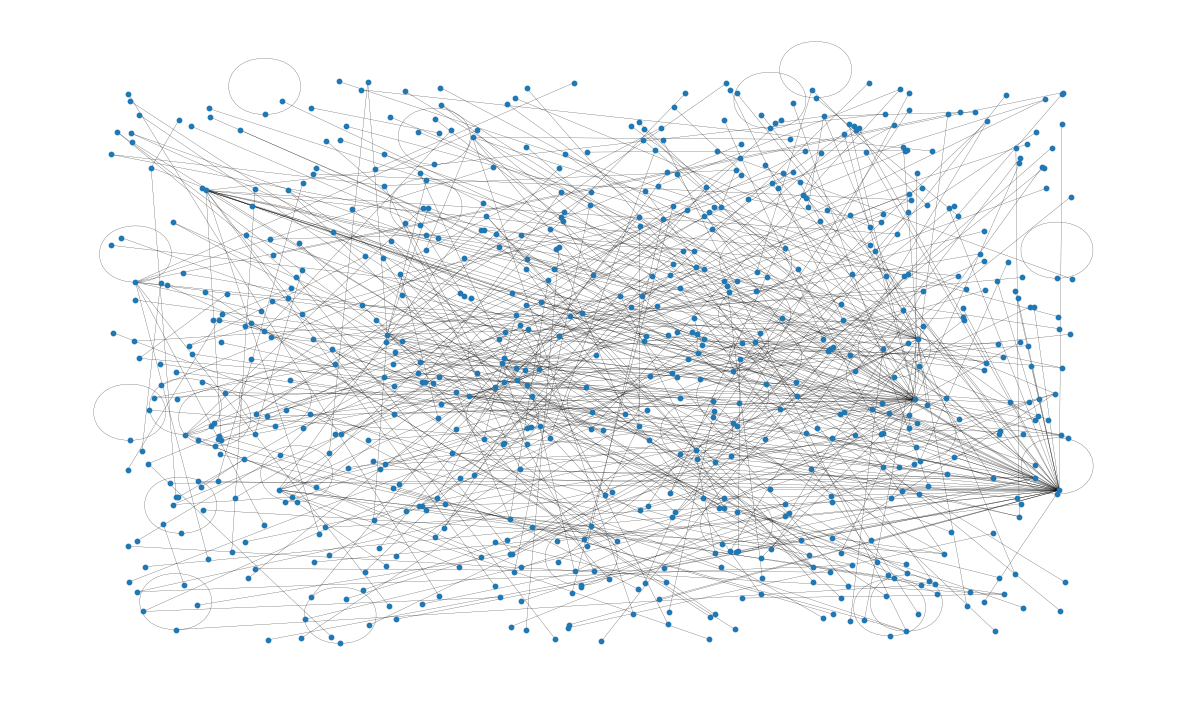

In [50]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(graph, pos=nx.random_layout(graph), ax=ax, **plot_options)

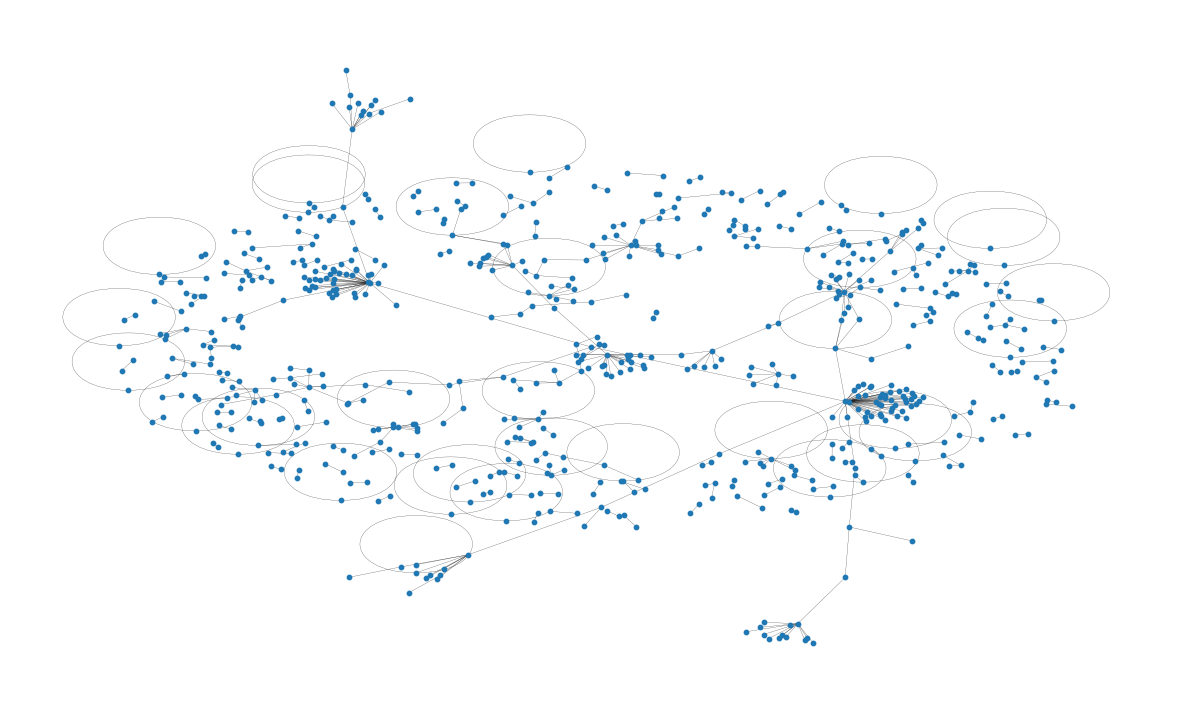

In [66]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(graph, pos=nx.spring_layout(graph), ax=ax, **plot_options)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(graph, pos=nx.random_layout(graph), ax=ax, **plot_options)

In [61]:
from random import randint

colors = {}  # use a dictionary to map node IDs to colors
counter = 0
for com in nx.community.label_propagation_communities(graph):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in com:  # assign color to each node in the community
        colors[node] = color
counter

223

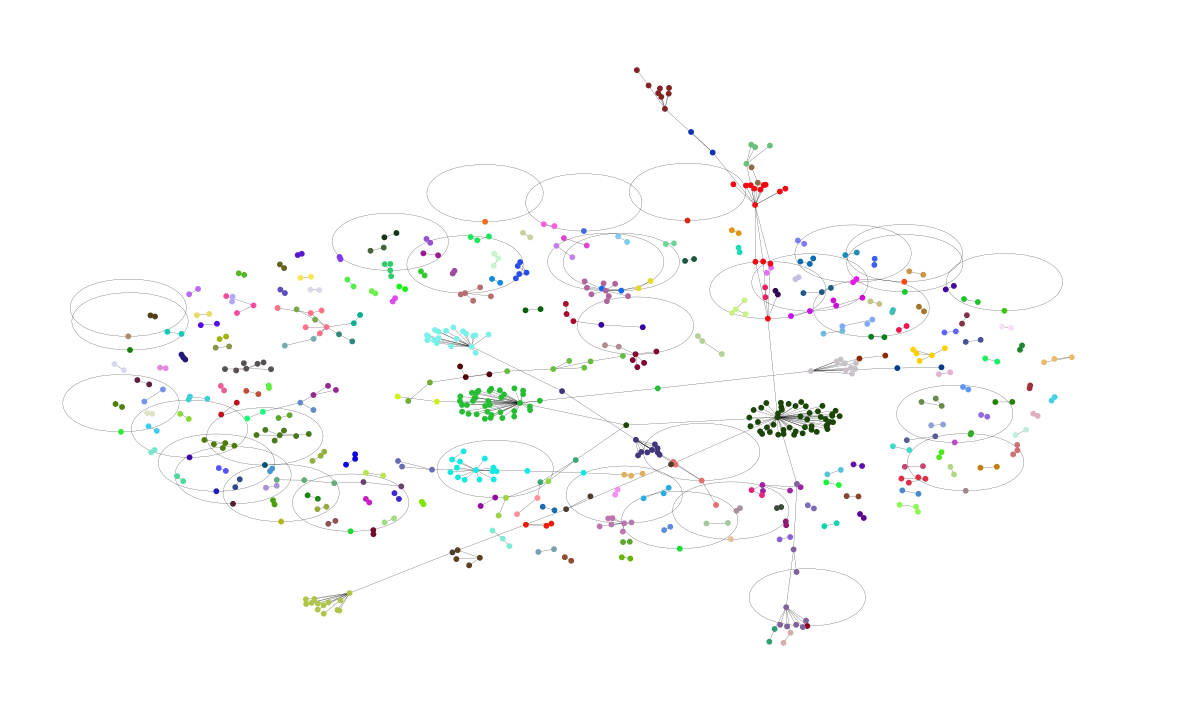

In [73]:
pos = nx.fruchterman_reingold_layout(graph)  # or use nx.spring_layout(graph) for a different layout
plt.figure(figsize=(15, 9))
plt.axis("off")
# Create a list of colors in the order of graph.nodes()
node_colors = [colors.get(node, "#333333") for node in graph.nodes()]
nx.draw_networkx(
    graph, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=node_colors
)

In [ ]:
communities = nx.community.label_propagation_communities(graph)
communities

dict_values([{'did:plc:mqf54kaagi4ah6lrbt64td7c', 'did:plc:qbzolwc7eeiplcghrwhp4kmq'}, {'did:plc:dc3npcufn6kovtfy2ctzj74x', 'did:plc:aptglza2pugxy4nss2aiu2er'}, {'did:plc:5a42db7sry5e4lmrxsrkooax', 'did:plc:zmw72zwhh27piy75erue36ap'}, {'did:plc:2wvcnvf4oetkemlpq7egso7i', 'did:plc:6ppsfmdqzkaq4f7uzncegdu2'}, {'did:plc:5o6k7jvowuyaquloafzn3cfw', 'did:plc:4didwbodfxpkl7dhinjisx4a', 'did:plc:r775wm2ddbd23fzc6f4cw7wx'}, {'did:plc:f4rqtrimydy4jedmp7g2nnbg', 'did:plc:occbscmv5jstjxwzcylqdzau'}, {'did:plc:runmfgidrl5houget6suiq2l', 'did:plc:arkwirmqtqmo7fzfzvoztwd5', 'did:plc:n24z4j7o5hhvdv4dho2zc5tb', 'did:plc:nj7w6ha4nl46kom27vyenlah', 'did:plc:a4yxhlpuxioimo6czhdcdxhb', 'did:plc:blrrsn4bjcbwds5m55dhe7j7', 'did:plc:w5zmqksx4hzyr5ek553hk4yo', 'did:plc:6hb67wrndvqmiwlmjk5ncf2c'}, {'did:plc:2ox36x7kcfl2fgchc5dzkco4', 'did:plc:e7mwxre2zz4dkvuxnqzo3ib2', 'did:plc:ojwszrpcvhwuhl4nhwactd2y', 'did:plc:kehyrlgirbe5r22hgwmorlg3', 'did:plc:w5w4a4pne3s4gvsgaid6rihy', nan}, {'did:plc:ubexpymccvoic5polcae

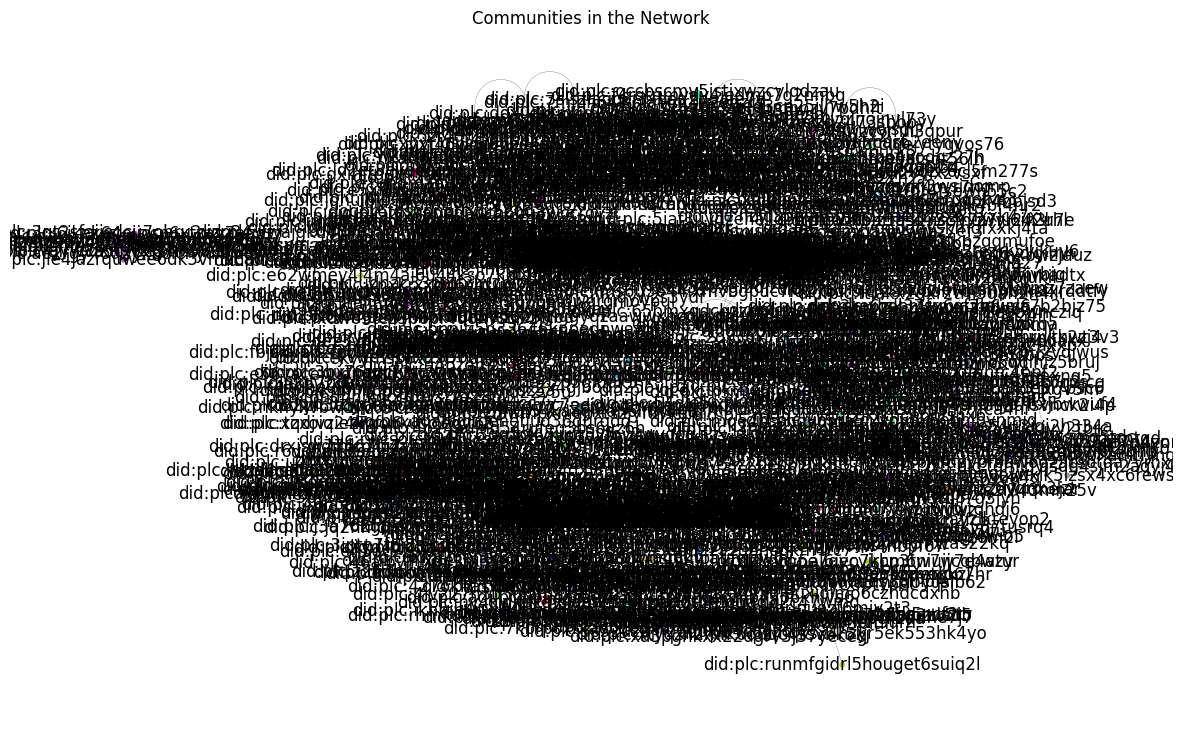

In [91]:
# Visualize the communities detected in the graph
import matplotlib.pyplot as plt
import networkx as nx

# Get the communities as a list of sets
communities = list(nx.community.label_propagation_communities(graph))

# Assign a color to each community
from random import randint
node_colors = {}
for com in communities:
    color = "#%06X" % randint(0, 0xFFFFFF)
    for node in com:
        node_colors[node] = color

# Draw the graph with community colors
pos = nx.spring_layout(graph)
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    graph,
    pos=pos,
    node_size=10,
    with_labels=True,
    width=0.15,
    node_color=[node_colors.get(node, "#333333") for node in graph.nodes()]
)
plt.title("Communities in the Network")
plt.show()

In [92]:
from random import randint
import networkx as nx

# Assuming 'graph' is your existing NetworkX graph object

# Assign community labels and colors to nodes, then export to GEXF
communities = list(nx.community.label_propagation_communities(graph))

# Assign a community label and color to each node
community_labels = {}
community_colors = {}
for idx, com in enumerate(communities):
    color = "#%06X" % randint(0, 0xFFFFFF)
    for node in com:
        community_labels[node] = idx
        community_colors[node] = color

nx.set_node_attributes(graph, community_labels, "community")
nx.set_node_attributes(graph, community_colors, "color")

nx.write_gexf(graph, "flood_communities.gexf")

In [93]:
# Compute and assign sample graph metrics as graph attributes
import networkx as nx

# If the graph is not connected, use the largest connected component for metrics that require connectivity
if not nx.is_connected(graph.to_undirected()):
    largest_cc = max(nx.connected_components(graph.to_undirected()), key=len)
    subgraph = graph.subgraph(largest_cc)
else:
    subgraph = graph

# Compute metrics
try:
    avg_shortest_path = nx.average_shortest_path_length(subgraph)
except Exception as e:
    avg_shortest_path = None
    print(f"Could not compute average shortest path length: {e}")

try:
    diameter = nx.diameter(subgraph)
except Exception as e:
    diameter = None
    print(f"Could not compute diameter: {e}")

density = nx.density(graph)
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

# Community metrics
communities = list(nx.community.label_propagation_communities(graph))
total_communities = len(communities)

# Connectivity
is_connected = nx.is_connected(graph.to_undirected())

# Assign as graph attributes
graph.graph['avg_shortest_path'] = avg_shortest_path
graph.graph['diameter'] = diameter
graph.graph['density'] = density
graph.graph['num_nodes'] = num_nodes
graph.graph['num_edges'] = num_edges
graph.graph['total_communities'] = total_communities
graph.graph['is_connected'] = is_connected

# Show the metrics
graph.graph

{'avg_shortest_path': 5.339088061260007,
 'diameter': 13,
 'density': 0.002309883848345387,
 'num_nodes': 676,
 'num_edges': 527,
 'total_communities': 223,
 'is_connected': False}

In [94]:
# Export the graph with updated attributes to GEXF
graph_file = "flood_communities_with_metrics.gexf"
nx.write_gexf(graph, graph_file)
print(f"Graph exported to {graph_file}")

Graph exported to flood_communities_with_metrics.gexf
